## imports and kaggle

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
!pip install -q kaggle

In [60]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [61]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [62]:
!chmod 600 ~/.kaggle/kaggle.json

In [63]:
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

historical-hourly-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
!ls

 city_attributes.csv		      kaggle.json    temperature.csv
 historical-hourly-weather-data.zip   model.png      weather_description.csv
 humidity.csv			      pressure.csv   wind_direction.csv
'kaggle (1).json'		      sample_data    wind_speed.csv


In [65]:
!unzip '/content/historical-hourly-weather-data.zip' -d '/content/'

Archive:  /content/historical-hourly-weather-data.zip
replace /content/city_attributes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# read data

In [66]:
data = pd.read_csv('/content/temperature.csv', header=0, index_col=0)
data.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [67]:
data = pd.concat([data['Portland'], data['Los Angeles'],data['Montreal']], axis=1)

# fill null

In [68]:
data.isna().sum()

Portland       1
Los Angeles    3
Montreal       3
dtype: int64

In [69]:
data = pd.concat([data.ffill(), data.bfill()]).groupby(level=0).mean() 

In [70]:
data.head()

,Portland,Los Angeles,Montreal
datetime,,,
2012-10-01 12:00:00,282.080000,291.870000,285.830000
2012-10-01 13:00:00,282.080000,291.870000,285.830000
2012-10-01 14:00:00,282.083252,291.868186,285.834650
2012-10-01 15:00:00,282.091866,291.862844,285.847790
2012-10-01 16:00:00,282.100481,291.857503,285.860929


In [71]:
data.isna().sum()

Portland       0
Los Angeles    0
Montreal       0
dtype: int64

# kelvin to centigrade

In [72]:
for col in data.columns:
  data[col] = round(data[col], 2)
  data[col] = data[col] - 273.15
data.head()

,Portland,Los Angeles,Montreal
datetime,,,
2012-10-01 12:00:00,8.93,18.72,12.68
2012-10-01 13:00:00,8.93,18.72,12.68
2012-10-01 14:00:00,8.93,18.72,12.68
2012-10-01 15:00:00,8.94,18.71,12.70
2012-10-01 16:00:00,8.95,18.71,12.71


In [73]:
# data = pd.concat([pd.DataFrame([x[0:4] for x in data['datetime']],columns=['year']) ,data ], axis=1)

In [74]:
data.head()

,Portland,Los Angeles,Montreal
datetime,,,
2012-10-01 12:00:00,8.93,18.72,12.68
2012-10-01 13:00:00,8.93,18.72,12.68
2012-10-01 14:00:00,8.93,18.72,12.68
2012-10-01 15:00:00,8.94,18.71,12.70
2012-10-01 16:00:00,8.95,18.71,12.71


# plot data

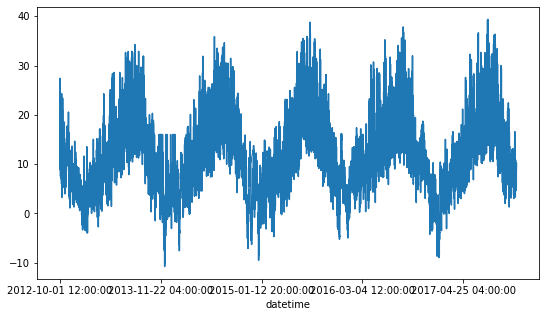

In [75]:
data['Portland'].plot(kind="line")
plt.show()

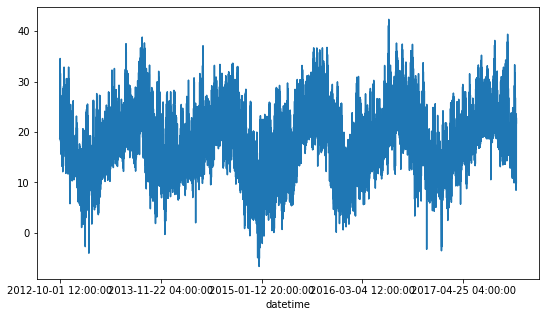

In [76]:
data['Los Angeles'].plot(kind="line")
plt.show()

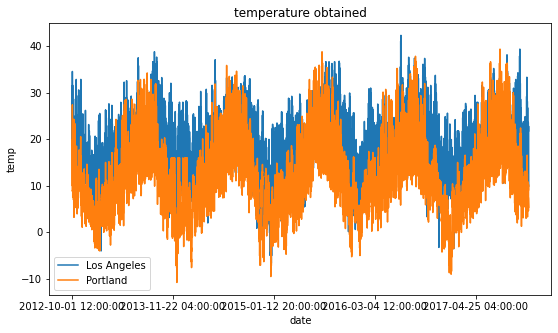

In [77]:
  
  
# Creation of Data
  
# Plotting the Data

data['Los Angeles'].plot(kind="line")
data['Portland'].plot(kind="line")

  
plt.xlabel('date')
plt.ylabel('temp')
plt.title("temperature obtained")
  
# plt.plot(y1, 'o:g', linestyle='--', linewidth='8')
# plt.plot(y2, 'o:g', linestyle='-.', linewidth='8')
  
plt.legend()

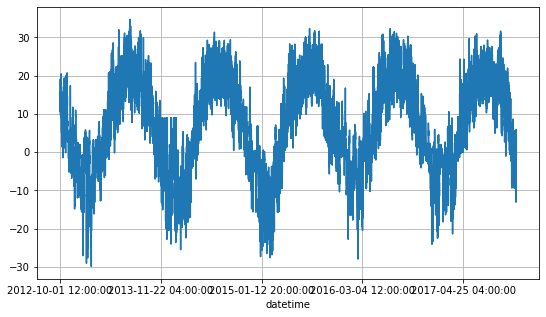

In [78]:
data['Montreal'].plot(grid=True)

In [79]:
data['Date'] = pd.to_datetime(data.index.values)
# Set the column 'Date' as index (skip if already done)
data = data.set_index('Date')
# Specify datetime frequency
data = data.asfreq('D')

# trend and seasonality

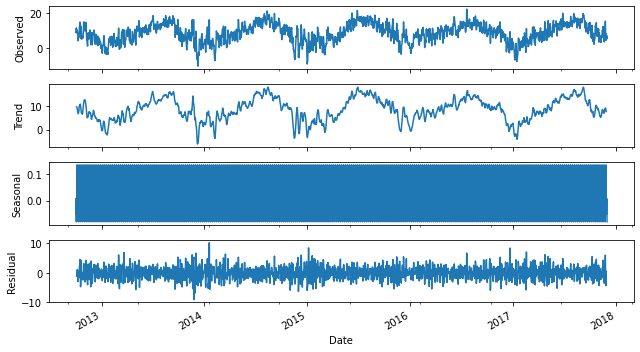

In [80]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(data['Portland'],model='additive')
fig = decompostion.plot()
plt.rcParams['figure.figsize'] = [9,5]

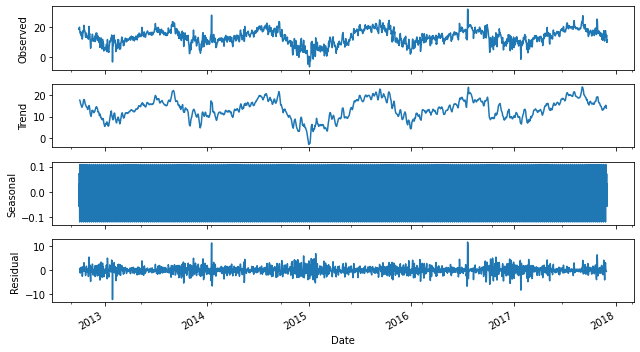

In [81]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(data['Los Angeles'],model='additive')
fig = decompostion.plot()
plt.rcParams['figure.figsize'] = [9,5]

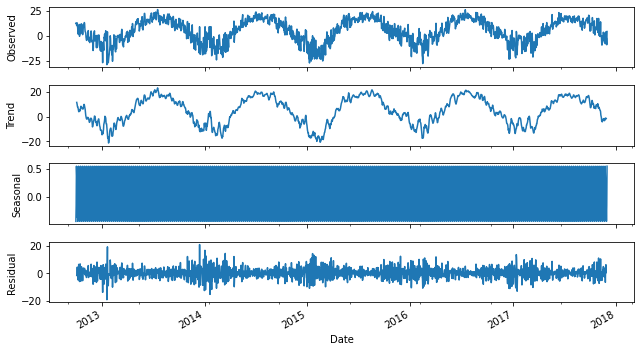

In [82]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(data['Montreal'],model='additive')
fig = decompostion.plot()
plt.rcParams['figure.figsize'] = [9,5]

# ADF statistic

In [83]:
from statsmodels.tsa.stattools import adfuller
series = data['Portland']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.854065
p-value: 0.002400
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [84]:
from statsmodels.tsa.stattools import adfuller
series = data['Los Angeles']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.805801
p-value: 0.002849
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [85]:
from statsmodels.tsa.stattools import adfuller
series = data['Montreal']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.504755
p-value: 0.114322
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# preproccesing

In [86]:
Portland = pd.DataFrame({
    "t_15": data["Portland"].shift(15), 
    "t_14": data["Portland"].shift(14), 
    "t_13": data["Portland"].shift(13), 
    "t_12": data["Portland"].shift(12), 
    "t_11": data["Portland"].shift(11), 
    "t_10": data["Portland"].shift(10), 
    "t_9": data["Portland"].shift(9), 
    "t_8": data["Portland"].shift(8), 
    "t_7": data["Portland"].shift(7), 
    "t_6": data["Portland"].shift(6), 
    "t_5": data["Portland"].shift(5), 
    "t_4": data["Portland"].shift(4), 
    "t_3": data["Portland"].shift(3), 
    "t_2": data["Portland"].shift(2), 
    "t_1": data["Portland"].shift(), 
    "Portland": data["Portland"]
})

In [87]:
Portland.head()

,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,Portland
Date,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93
2012-10-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93,9.12
2012-10-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93,9.12,11.43
2012-10-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93,9.12,11.43,8.55
2012-10-05 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.93,9.12,11.43,8.55,10.37


In [88]:
Portland.dropna(inplace=True,axis=0)

In [89]:
Portland.head()

,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,Portland
Date,,,,,,,,,,,,,,,,
2012-10-16 12:00:00,8.93,9.12,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75
2012-10-17 12:00:00,9.12,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05
2012-10-18 12:00:00,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05,5.44
2012-10-19 12:00:00,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05,5.44,6.02
2012-10-20 12:00:00,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05,5.44,6.02,12.32


In [90]:
X = Portland.drop(columns=['Portland'])
y = pd.DataFrame(Portland['Portland'])
X.head()

,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1
Date,,,,,,,,,,,,,,,
2012-10-16 12:00:00,8.93,9.12,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67
2012-10-17 12:00:00,9.12,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75
2012-10-18 12:00:00,11.43,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05
2012-10-19 12:00:00,8.55,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05,5.44
2012-10-20 12:00:00,10.37,10.07,9.12,8.28,4.10,5.80,5.69,6.23,8.29,12.39,12.67,14.75,12.05,5.44,6.02


In [91]:
y.head()

,Portland
Date,
2012-10-16 12:00:00,14.75
2012-10-17 12:00:00,12.05
2012-10-18 12:00:00,5.44
2012-10-19 12:00:00,6.02
2012-10-20 12:00:00,12.32


In [92]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=2,
    gap=1,
    max_train_size=1800,
    test_size=100,
)

In [93]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

In [94]:
X_test = X.iloc[test_0]
X_train = X.iloc[train_0]
y_test = y.iloc[test_0]
y_train = y.iloc[train_0]

In [95]:
print(len(X_test),len(X_train),len(y_test),len(y_train))

100 1670 100 1670


In [96]:
from sklearn.preprocessing import StandardScaler
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

y_train_scaled = scalerx.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns = ['temp'])

y_test_scaled = scalerx.transform(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns = ['temp'])

# models

RNN(LSTM)

In [97]:
from keras.layers import Dense , Dropout , Input , LSTM ,GRU
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import librosa
import glob

In [ ]:
input = Input(shape=(15,1), name ="Input")
lstm_layer = LSTM(50,activation='relu', return_sequences=True)(input)
hidden_layer1 = LSTM(50 ,activation='relu' , name="layer1")(lstm_layer)
output_layer = Dense(1 ,activation='linear' , name="output")(hidden_layer1)

model = Model(inputs=input, outputs=output_layer , name = "model1")
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 15, 1)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            10400     
                                                                 
 layer1 (LSTM)               (None, 50)                20200     
                                                                 
 output (Dense)              (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# input = Input(shape=(15,1), name ="Input")
# lstm_layer = LSTM(50, return_sequences=False)(input)
# hidden_layer1 = Dense(38 ,activation='relu' , name="layer1")(lstm_layer)
# hidden_layer2 = Dense(30 ,activation='relu' , name="layer2")(hidden_layer1)
# hidden_layer3 = Dense(20 ,activation='relu' , name="layer3")(hidden_layer2)
# droupout_layer = Dropout(0.2)(hidden_layer3)
# hidden_layer4 = Dense(10 ,activation='relu' , name="layer4")(droupout_layer)
# hidden_layer5 = Dense(5 ,activation='relu' , name="layer5")(hidden_layer4)
# output_layer = Dense(1 ,activation='linear' , name="output")(hidden_layer5)

# model = Model(inputs=input, outputs=output_layer , name = "model1")
# model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 15, 1)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 20)                1760      
                                                                 
 layer1 (Dense)              (None, 38)                798       
                                                                 
 layer2 (Dense)              (None, 30)                1170      
                                                                 
 layer3 (Dense)              (None, 20)                620       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 layer4 (Dense)              (None, 10)                210  

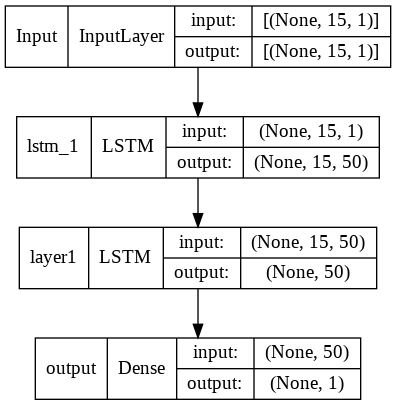

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
import keras
from tensorflow.keras import optimizers
sgd = SGD(lr=0.09, momentum=0.9)
adam = optimizers.Adam()
rms = optimizers.RMSprop()
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
42/42 [==============================] - 4s 33ms/step - loss: 32.6504 - val_loss: 9.8488
Epoch 2/150
42/42 [==============================] - 1s 22ms/step - loss: 11.2645 - val_loss: 8.5926
Epoch 3/150
42/42 [==============================] - 1s 22ms/step - loss: 8.8410 - val_loss: 8.1937
Epoch 4/150
42/42 [==============================] - 1s 22ms/step - loss: 7.8826 - val_loss: 7.8331
Epoch 5/150
42/42 [==============================] - 1s 22ms/step - loss: 7.4694 - val_loss: 7.5374
Epoch 6/150
42/42 [==============================] - 1s 22ms/step - loss: 7.2967 - val_loss: 7.5483
Epoch 7/150
42/42 [==============================] - 1s 22ms/step - loss: 7.2546 - val_loss: 7.2008
Epoch 8/150
42/42 [==============================] - 1s 22ms/step - loss: 7.1376 - val_loss: 7.4039
Epoch 9/150
42/42 [==============================] - 1s 22ms/step - loss: 7.0017 - val_loss: 7.7122
Epoch 10/150
42/42 [==============================] - 1s 23ms/step - loss: 7.1178 - val_loss: 7.68

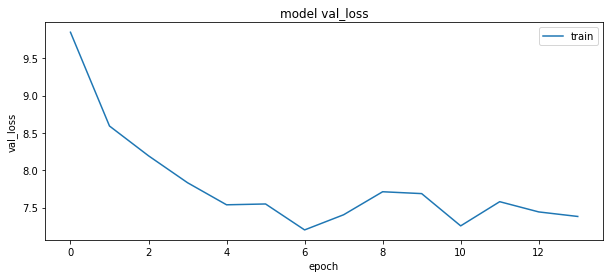

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
ypred = model.predict(X_test_scaled)
errors = mean_squared_error(y_test_scaled, ypred)
print(errors)

4.042839809770181


Conv1D

In [ ]:
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization,MaxPooling1D, Conv1D
input = Input(shape=(15,1), name ="Input")
lstm_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input)
hidden_layer1 = Conv1D(filters=64, kernel_size=3, activation='relu')(lstm_layer)
droupout_layer = Dropout(0.2)(hidden_layer1)
hidden_layer2 = MaxPooling1D(pool_size=2)(droupout_layer)
flatt_leyer = Flatten()(hidden_layer2)
hidden_layer3 = Dense(100, activation='relu')(flatt_leyer)
output_layer = Dense(1 ,activation='linear' , name="output")(hidden_layer3)

model = Model(inputs=input, outputs=output_layer , name = "model1")
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 15, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 13, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            12352     
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                            

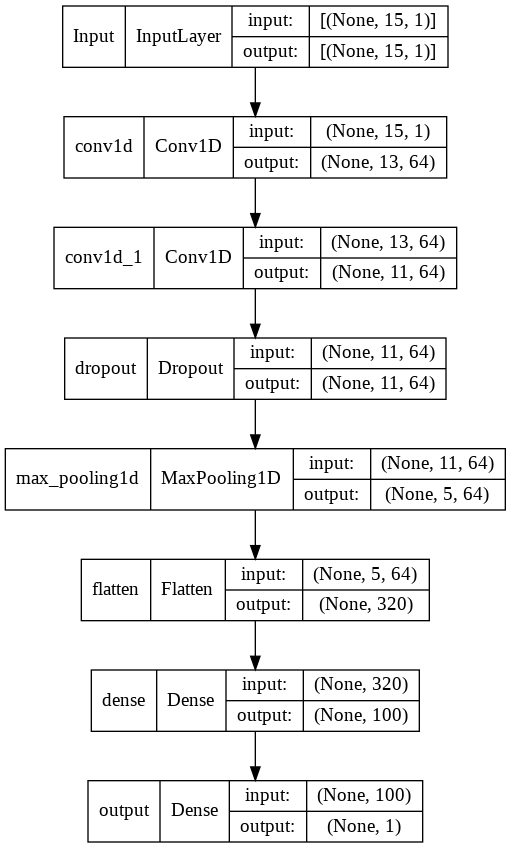

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
import keras
from tensorflow.keras import optimizers
sgd = SGD(lr=0.09, momentum=0.9)
adam = optimizers.Adam()
rms = optimizers.RMSprop()
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=7)
model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train,y_train ,epochs=150,batch_size = 32 ,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/150
42/42 [==============================] - 1s 12ms/step - loss: 23.4446 - val_loss: 15.0274
Epoch 2/150
42/42 [==============================] - 0s 7ms/step - loss: 12.5309 - val_loss: 12.7241
Epoch 3/150
42/42 [==============================] - 0s 7ms/step - loss: 11.6079 - val_loss: 11.7464
Epoch 4/150
42/42 [==============================] - 0s 7ms/step - loss: 10.8982 - val_loss: 13.6932
Epoch 5/150
42/42 [==============================] - 0s 7ms/step - loss: 10.7985 - val_loss: 11.9718
Epoch 6/150
42/42 [==============================] - 0s 7ms/step - loss: 10.8218 - val_loss: 11.5787
Epoch 7/150
42/42 [==============================] - 0s 7ms/step - loss: 10.4407 - val_loss: 11.4869
Epoch 8/150
42/42 [==============================] - 0s 7ms/step - loss: 10.2468 - val_loss: 10.3527
Epoch 9/150
42/42 [==============================] - 0s 8ms/step - loss: 10.1236 - val_loss: 11.2213
Epoch 10/150
42/42 [==============================] - 0s 7ms/step - loss: 9.8015 - val_los

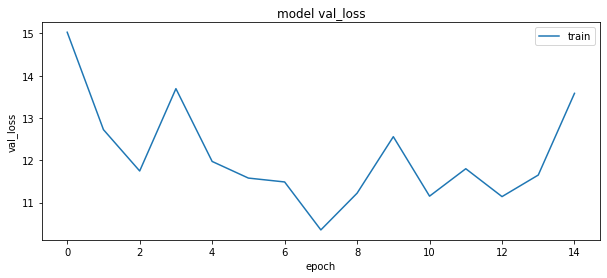

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
ypred = model.predict(X_test_scaled)
errors = mean_squared_error(y_test_scaled, ypred)
print(errors)

0.49636586613039496


ARIMA

In [99]:
train = pd.DataFrame(data['Portland'][:1553])
test = pd.DataFrame(data['Portland'][1553:])

In [100]:
print(train.shape)
print(test.shape)

(1553, 1)
(333, 1)


                             ARIMA Model Results                              
Dep. Variable:            D2.Portland   No. Observations:                 1551
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3973.388
Method:                       css-mle   S.D. of innovations              3.134
Date:                Tue, 25 Jan 2022   AIC                           7960.777
Time:                        10:22:14   BIC                           7998.203
Sample:                    10-03-2012   HQIC                          7974.696
                         - 12-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.020     -0.021      0.983      -0.039       0.038
ar.L1.D2.Portland    -0.9317      0.025    -37.595      0.000      -0.980      -0.883
ar.L2.D2.Portland    -0.

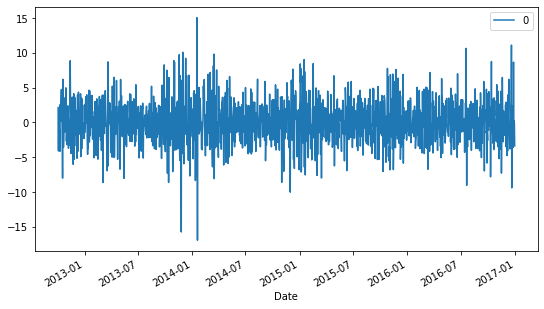

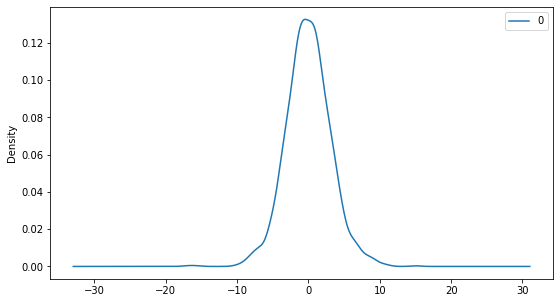

                 0
count  1551.000000
mean     -0.000427
std       3.136262
min     -16.941413
25%      -1.909025
50%      -0.042773
75%       1.864907
max      15.039187


In [101]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
# fit model

model = ARIMA(train,order =(5,2,0))
model_fit = model.fit()
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


In [ ]:
history = [x[0] for x in train.values]

In [ ]:
pred = []
for i in range(len(test)):
  model = ARIMA(history, order=(5,2,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  pred.append(output[0])
  history.append(test.loc[test.index[i],'Portland'])

mse = mean_squared_error(test, pred)
print(f'Test MSE: {mse}')

Test MSE: 10.046501553314718


No handles with labels found to put in legend.


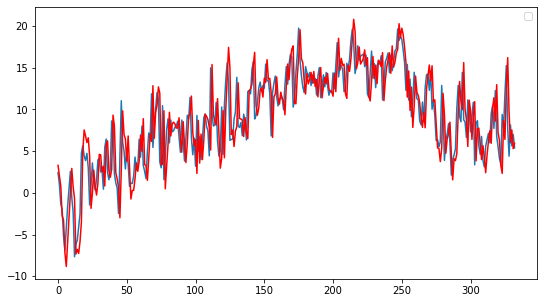

In [ ]:
plt.plot(test.values)
plt.plot(pred, color='red')
plt.legend()
plt.show()

Prophet

In [102]:
train['date'] = train.index
test['date'] = test.index

In [103]:
train

,Portland,date
Date,,
2012-10-01 12:00:00,8.93,2012-10-01 12:00:00
2012-10-02 12:00:00,9.12,2012-10-02 12:00:00
2012-10-03 12:00:00,11.43,2012-10-03 12:00:00
2012-10-04 12:00:00,8.55,2012-10-04 12:00:00
2012-10-05 12:00:00,10.37,2012-10-05 12:00:00
...,...,...
2016-12-27 12:00:00,5.41,2016-12-27 12:00:00
2016-12-28 12:00:00,2.72,2016-12-28 12:00:00
2016-12-29 12:00:00,3.31,2016-12-29 12:00:00


In [104]:
import fbprophet
from fbprophet import Prophet
model = Prophet()
train.columns = ['y','ds']
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
test.columns = ['y','ds']
X_test = pd.DataFrame(test['ds'])
pred = model.predict(X_test)

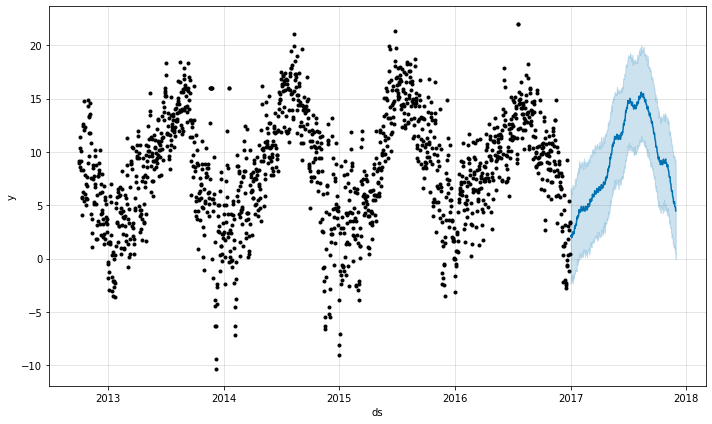

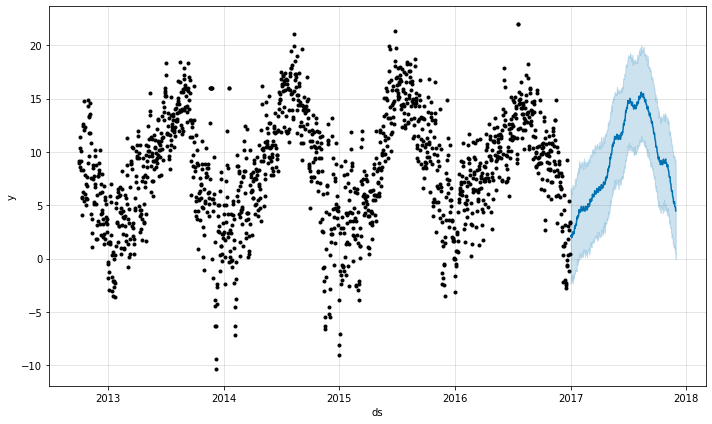

In [106]:
model.plot(pred)

In [107]:
pred = pd.merge(pred,test ,on="ds")[['ds','y','yhat']]

In [108]:
mse = mean_squared_error(pred['y'], pred['yhat'])
print(f'Test MSE: {mse}')

Test MSE: 9.003242818901757
